In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Display all the columns of the dataframes
pd.pandas.set_option('display.max_columns', None) ## (set option is used so that we can see all the columns otherwise it will show ....)

In [2]:
dataset = pd.read_csv('netflix__titles.csv')

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 757.0+ KB


In [27]:
dataset.shape

(8807, 11)

In [28]:
dataset.head(5)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
dataset.drop('show_id', axis=1, inplace=True)

In [7]:
dataset.isnull().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [49]:
dataset['country'].dropna(inplace=True, how='all')

In [8]:
dataset['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

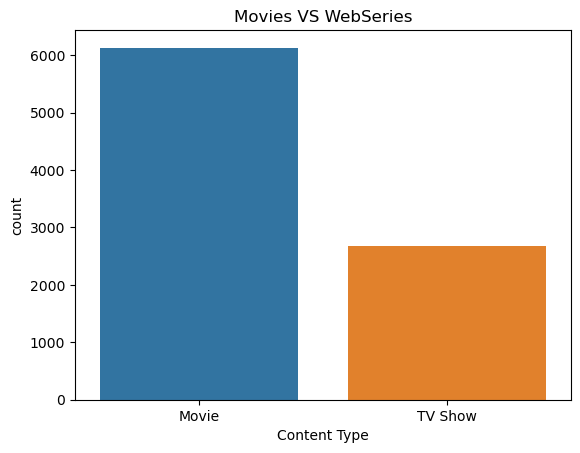

In [9]:
sns.countplot(dataset['type'])
plt.title('Movies VS WebSeries')
plt.xlabel('Content Type')
plt.show()

### Does Netflix has more focus on TV Shows than movies in recent years? 

#### Observation from above: By the look of the count plot it looks like Netflix is still investing/focusing more on the movies in compare to the web series. 

In [10]:
features_with_NaN = [feature for feature in dataset.columns if dataset[feature].isnull().sum() >= 1]

In [11]:
features_with_NaN

['director', 'cast', 'country', 'date_added', 'rating', 'duration']

In [12]:
for feature in features_with_NaN:
    print(feature, np.round(dataset[feature].isnull().mean(), 3), "% missing values")

director 0.299 % missing values
cast 0.094 % missing values
country 0.094 % missing values
date_added 0.001 % missing values
rating 0.0 % missing values
duration 0.0 % missing values


In [13]:
dataset['country'].mode().sum()

'United States'

In [14]:
dataset['country'].isnull().sum()

831

In [ ]:
dataset['country'].unique()

In [16]:
dataset['country'].dtype

dtype('O')

In [17]:
dataset.listed_in.dtype

dtype('O')

In [18]:
dataset['country'].dropna(inplace=True, axis=0, how=all)

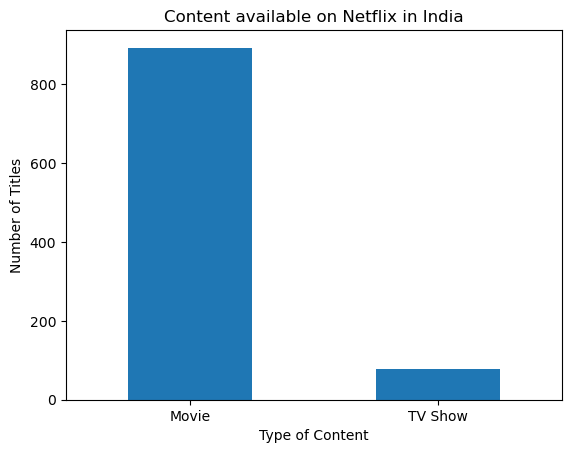

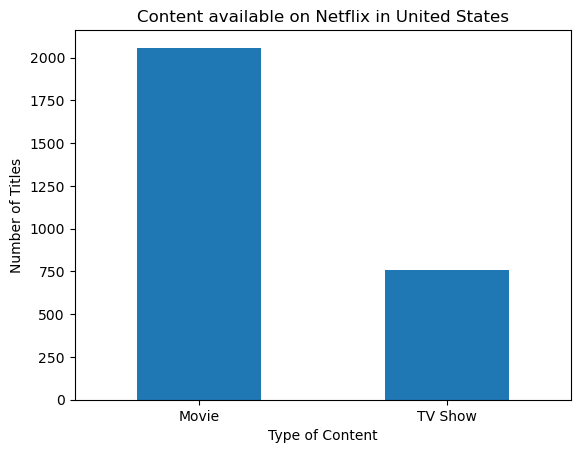

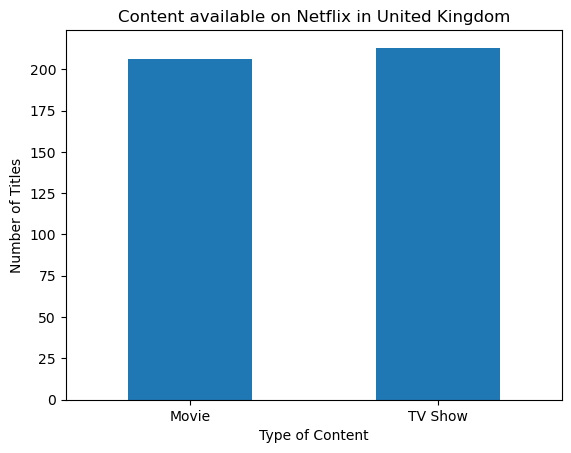

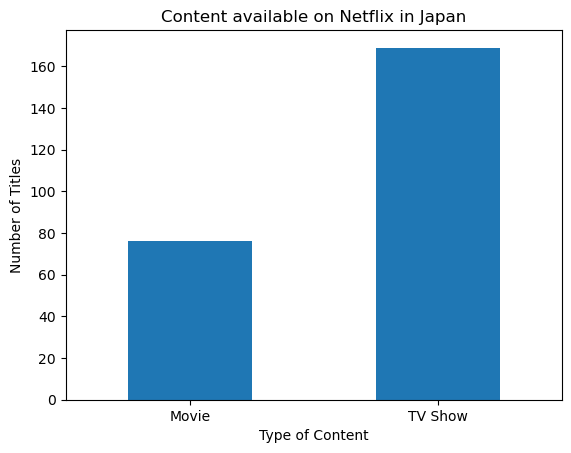

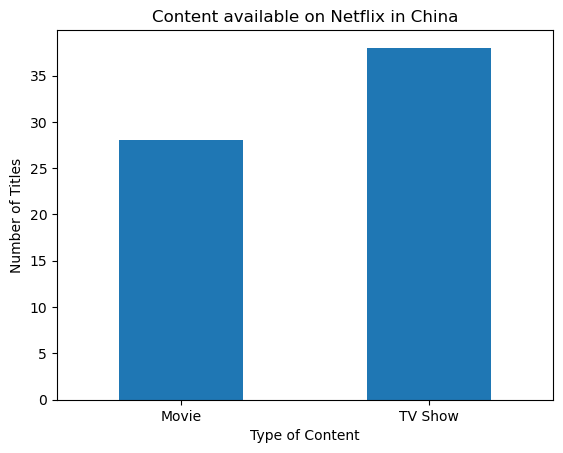

In [19]:
# Taking some of the major countries into consideration to see the type of content which is widely available.

countries = ['India', 'United States', 'United Kingdom', 'Japan', 'China']
for country in countries:
    data_country = dataset[dataset['country'] == country]
    data_grouped = data_country.groupby('type')['title'].count()
    data_grouped.plot(kind='bar', title=f'Content available on Netflix in {country}', rot=0)
    plt.xlabel('Type of Content')
    plt.ylabel('Number of Titles')
    plt.show()

#### Contents availabilty observation for 5 of the major countries: 

##### From the above bar plots the key points which we were able to observe country-wise:

1. **India**: The type of content which is mostly available and we can say widely consumed by the consumers are "Movies" with more than **800** titles available in compare to "Web Series" which is less than **200**.

2. **United States**: The type of content which is mostly available and we can say widely consumed by the consumers are "Movies" with more than **2000** titles available in compare to "Web Series" >= **750**.

3. **United Kingdom**: In case of UK the titles available in both the types are almost equal. Looks like people over their do not discriminate in terms of their content consumption between both the types and titles available is more than **200** in both the cases.

4. **Japan**: In case of Japan the titles available are more inclined towards "TV Shows" which is more than **160** compare to "Movies" which is less than **80**. This can be because of the fact that Japan is one of the major country where most of the ***Anime*** series are made. 

5. **China**: In case of our favourite rival China we see a very less of titles available overall. This can be because most of the ***outside contents are blocked*** in China and they only have access to insider contents/titles.

In [29]:
dataset.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


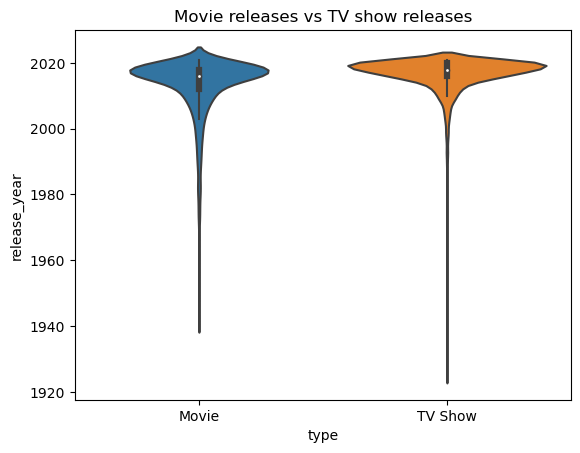

In [48]:
sns.violinplot(x='type', y='release_year', data=dataset, split=True, scale='area', inner='box', bw=0.2)
plt.title('Movie releases vs TV show releases')
plt.show()

#### Observation from above: 

##### From the above violin plot the key points which we are able to observe:

1. NetFlix has both **TV shows** & **Movies** in it's platform which were released long back even before ***1940's***.

2. In terms of content availability NetFlix goes even close to ***1920's*** in terms of TV shows in compare to Movies. 

3. It is also to be observed that in case of **data dispersion** we can see TV shows are widely dispersed in compare to the Movies. 